# Flower Detector

In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random as rn

import cv2
from tqdm import tqdm
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [2]:
pwd

'/content'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
my_data= '/content/drive/MyDrive/SLIIT/Y4S1/DL/flowers'
my_data

'/content/drive/MyDrive/SLIIT/Y4S1/DL/flowers'

In [5]:
os.listdir(my_data)

['tulip', 'rose', 'sunflower', 'daisy', 'dandelion', 'train', 'test']

In [6]:
X = []
Z = []
IMG_SIZE = 150
FLOWER_DAISY_DIR = my_data + '/daisy/'
FLOWER_SUNFLOWER_DIR = my_data + '/sunflower/'
FLOWER_TULIP_DIR = my_data + '/tulip/'
FLOWER_DANDI_DIR = my_data + '/dandelion/'
FLOWER_ROSE_DIR = my_data + '/rose/'
FLOWER_ROSE_DIR

'/content/drive/MyDrive/SLIIT/Y4S1/DL/flowers/rose/'

In [7]:
data_folder = '/content/drive/MyDrive/SLIIT/Y4S1/DL/flowers'

import os
import shutil

train_folder = os.path.join(data_folder, 'train')
test_folder = os.path.join(data_folder, 'test')

train_folder

'/content/drive/MyDrive/SLIIT/Y4S1/DL/flowers/train'

In [8]:
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [9]:
for flower_class in classes:

    train_class_folder = os.path.join(train_folder, flower_class)
    test_class_folder = os.path.join(test_folder, flower_class)
    # create folders
    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(test_class_folder, exist_ok=True)

## Randomly add images to train folders

In [10]:
import random

split_ratio = 0.8  # Train için %80, Test için %20
for flower_class in classes:
    flower_images = os.listdir(os.path.join(data_folder, flower_class))
    random.shuffle(flower_images)

    split_index = int(len(flower_images) * split_ratio)

    for image in flower_images[:split_index]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(train_folder, flower_class, image)
        shutil.copy(src, dest)

    for image in flower_images[split_index:]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(test_folder, flower_class, image)
        shutil.copy(src, dest)


In [11]:
train_path = my_data+'/train/'
test_path = my_data+'/test/'
print(os.listdir(train_path))
print(os.listdir(test_path))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [12]:
import os
import matplotlib.pyplot as plt

classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

data_dir = '/content/drive/MyDrive/SLIIT/Y4S1/DL/flowers'

total_counts = []
total = 0
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len([fname for fname in os.listdir(class_dir) if fname.endswith('.jpg')])
    total_counts.append(num_images)
    total += num_images
    print(class_dir)
    print('num of Imgs =', num_images)

print('TOTAL = ',total)
total_counts

/content/drive/MyDrive/SLIIT/Y4S1/DL/flowers/daisy
num of Imgs = 764
/content/drive/MyDrive/SLIIT/Y4S1/DL/flowers/dandelion
num of Imgs = 1052
/content/drive/MyDrive/SLIIT/Y4S1/DL/flowers/rose
num of Imgs = 784
/content/drive/MyDrive/SLIIT/Y4S1/DL/flowers/sunflower
num of Imgs = 733
/content/drive/MyDrive/SLIIT/Y4S1/DL/flowers/tulip
num of Imgs = 984
TOTAL =  4317


[764, 1052, 784, 733, 984]

In [ ]:
import seaborn as sns
from skimage.io import imread
import os

x = []
y = []
hue = []

for class_name in classes:
    class_dir = os.path.join(train_path, class_name)

    for image_name in os.listdir(class_dir):
        if image_name.endswith('.jpg'):  # Sadece .jpg dosyalarını işle
            img = imread(os.path.join(class_dir, image_name))
            d1, d2, colors = img.shape
            x.append(d1)
            y.append(d2)
            hue.append(class_name)


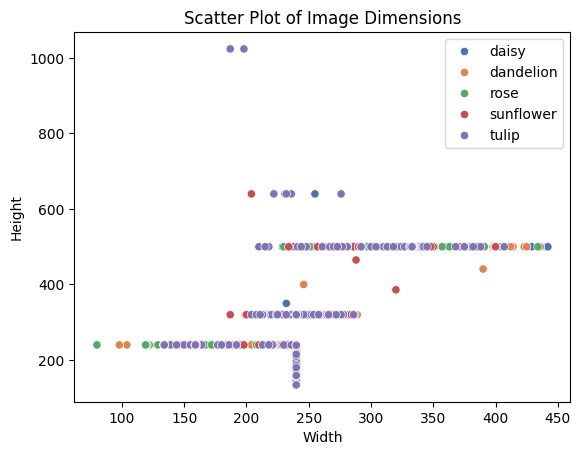

In [14]:
sns.scatterplot(x=x, y=y, hue=hue, palette="deep")
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Scatter Plot of Image Dimensions')
plt.show()

In [15]:
print(np.mean(x), np.mean(y))

252.81384652626483 338.36359235052043


In [16]:
path1=train_path+'/daisy'+"/1342002397_9503c97b49.jpg"
path1

'/content/drive/MyDrive/SLIIT/Y4S1/DL/flowers/train//daisy/1342002397_9503c97b49.jpg'

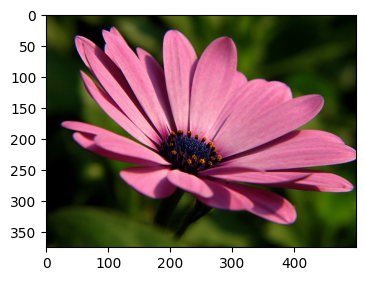

In [17]:
flower_img=imread(path1)
plt.figure(figsize=(4,5))
plt.imshow(flower_img);

In [18]:
path2=train_path+'/daisy'+"/5547758_eea9edfd54_n.jpg"
path2

'/content/drive/MyDrive/SLIIT/Y4S1/DL/flowers/train//daisy/5547758_eea9edfd54_n.jpg'

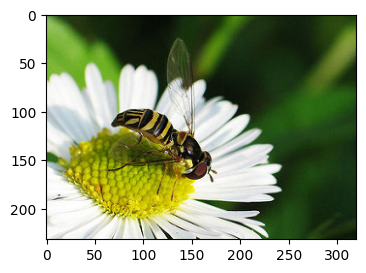

In [19]:
s_flower_img=imread(path2)
plt.figure(figsize=(4,5))
plt.imshow(s_flower_img);

In [20]:
s_img = imread(path2)

s_d1, s_d2, s_colors = s_img.shape
print(s_d1, s_d2, s_colors)

232 320 3


In [21]:
flower_img.max(), flower_img.min()

(255, 0)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

flower_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allowe horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )
flower_gen

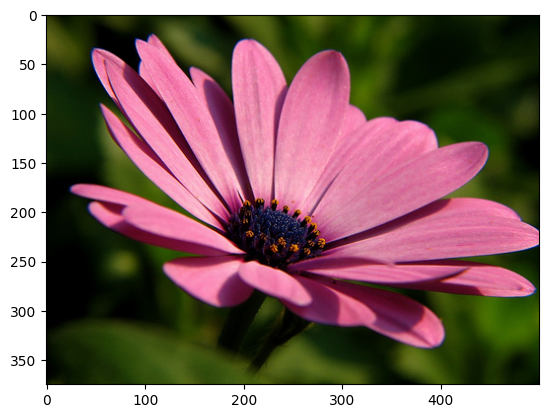

In [23]:
plt.imshow(flower_img)

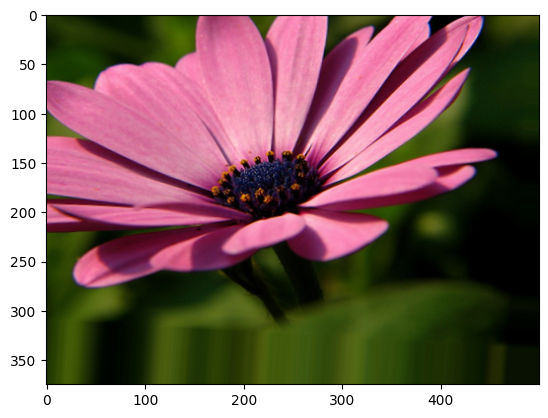

In [24]:
plt.imshow(flower_gen.random_transform(flower_img))

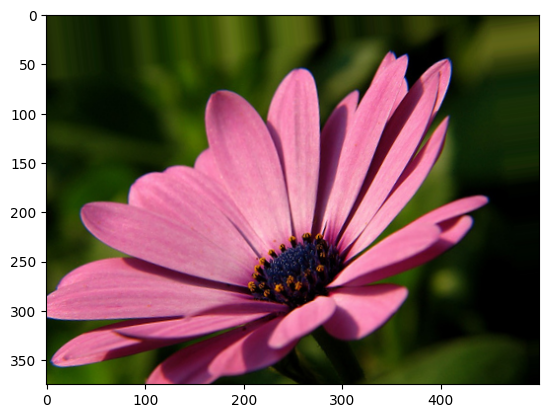

In [25]:
plt.imshow(flower_gen.random_transform(flower_img))

# Create The Model

In [26]:
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [27]:
from tensorflow.keras.layers import BatchNormalization

## Train Images

In [28]:
batch_size = 32
train_flower_gen = flower_gen.flow_from_directory(train_path,

                                               target_size=(224,224),

                                               color_mode='rgb',

                                               batch_size=batch_size,

                                               class_mode='sparse', shuffle=True)

Found 4131 images belonging to 5 classes.


## Test Images

In [29]:
flower_gen_test = ImageDataGenerator()

test_flower_gen = flower_gen_test.flow_from_directory(test_path,

                                                   target_size=(224,224),

                                                   color_mode='rgb',

                                                   batch_size=batch_size,

                                                   class_mode='sparse', shuffle=True)

Found 1544 images belonging to 5 classes.


# ResNet152

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
import tensorflow as tf

image_shape = (224, 224, 3)

# Create a Sequential model
resnet_model = Sequential()

# Add an Input layer
resnet_model.add(Input(shape=image_shape))

# Load the pre-trained ResNet152 model
pretrained_model = tf.keras.applications.ResNet152(include_top=False,
                                                   input_shape=image_shape,
                                                   pooling='avg',
                                                   weights="imagenet")

# Freeze the pre-trained model layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the pre-trained ResNet model to the Sequential model
resnet_model.add(pretrained_model)

# Add dense layers
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

# Compile the model
resnet_model.compile(loss='sparse_categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

# Now the model summary should work
resnet_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet152 (Functional)               │ (None, 2048)                │      58,370,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,486,341 (226.92 MB)

 Trainable params: 1,115,397 (4.25 MB)

 Non-trainable params: 58,370,944 (222.67 MB)

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# restore_best_weights eğitimin erken durdurulması durumunda, modelin ağırlıkları,
# izlenen metriğin en iyi değerini verdiği anda kaydedilen ağırlıklarla değiştirilir.
# Loss degeri belirli bir noktadan sonra artmaya baslayip model durursa,
# bu parametre sayesinde loss degerinin en dusuk oldugu skorla degistirir.

In [37]:
history_resnet152 = resnet_model.fit(train_flower_gen,epochs=10,
                    validation_data=test_flower_gen,
                    callbacks=[early_stop])

Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 129s 777ms/step - accuracy: 0.2869 - loss: 1.6078 - val_accuracy: 0.1742 - val_loss: 3.5682
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 85s 633ms/step - accuracy: 0.3546 - loss: 1.5099 - val_accuracy: 0.1665 - val_loss: 4.2913
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 143s 634ms/step - accuracy: 0.3756 - loss: 1.4592 - val_accuracy: 0.2150 - val_loss: 4.7946
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 141s 634ms/step - accuracy: 0.3806 - loss: 1.4417 - val_accuracy: 0.2073 - val_loss: 4.6493
